# Ejercicio 1: scoring
---

El Banco, Scoring Bank, dispone de un dataset, "ScoringBank-compra-venta.cvs", con un histórico de clientes al respecto de su advising service de ayuda asus cllientes a la hora de decidir si comprar un inmueble o bien alquilar.

El metadata subyacente, o significado de datos es:

- ```Ingresos```: los ingresos de la familia mensual
- ```Gastos comunes```: pagos de luz, agua, gas, etc mensual
- ```Pago coche```: si se está pagando cuota por uno o más coches, y los gastos en combustible, etc al mes.
- ```Gastos_otros```: compra en supermercado y lo necesario para vivir al mes
- ```Ahorros```: suma de ahorros dispuestos a usar para la compra de la casa.
- ```Vivienda```: precio de la vivienda que quiere comprar esa familia
- ```Estado civil```:
    -   0-soltero
    -   1-casados
    -   2-divorciados
- ```Hijos```: cantidad de hijos menores y que no trabajan.
- ```Trabajo```:
    -   0-sin empleo 
    -   1-autónomo (freelance)
    -   2-empleado
    -   3-empresario
    -   4-pareja: autónomos
    -   5-pareja: empleados
    -   6-pareja: autónomo y asalariado
    -   7-pareja:empresario y autónomo
    -   8-pareja: empresarios los dos o empresario y empleado
- ```Comprar```: 
    - 0-No comprar 
    - 1-Comprar (_esta será nuestra columna de salida, para aprender_)

Se solicita un modelo de "advising service" de Scoring Bank, para la predicción/consejo subyacente.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import statsmodels.api as sm
import pandas as pd
import numpy as np
from IPython.display import IFrame
import warnings

warnings.filterwarnings('ignore')

In [61]:
advising_service = pd.read_csv('ScoringBank-compra-venta.csv')

In [336]:
advising_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [337]:
advising_service

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [63]:
advising_service.corr(method="pearson")

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
ingresos,1.000000,0.560211,-0.109780,-0.124105,0.712889,0.614721,-0.042556,-0.024483,-0.038852,0.467123
gastos_comunes,0.560211,1.000000,-0.054400,-0.099881,0.209414,0.204781,-0.057152,-0.072321,-0.079095,0.200191
pago_coche,-0.109780,-0.054400,1.000000,0.010602,-0.193299,-0.094631,0.052239,-0.044858,0.018946,-0.196468
gastos_otros,-0.124105,-0.099881,0.010602,1.000000,-0.064384,-0.054577,-0.020226,0.124845,0.047313,-0.110330
ahorros,0.712889,0.209414,-0.193299,-0.064384,1.000000,0.605836,-0.063039,0.001445,-0.023829,0.340778
vivienda,0.614721,0.204781,-0.094631,-0.054577,0.605836,1.000000,-0.113420,-0.141924,-0.211790,-0.146092
estado_civil,-0.042556,-0.057152,0.052239,-0.020226,-0.063039,-0.113420,1.000000,0.507609,0.589512,0.142799
hijos,-0.024483,-0.072321,-0.044858,0.124845,0.001445,-0.141924,0.507609,1.000000,0.699916,0.272883
trabajo,-0.038852,-0.079095,0.018946,0.047313,-0.023829,-0.211790,0.589512,0.699916,1.000000,0.341537
comprar,0.467123,0.200191,-0.196468,-0.110330,0.340778,-0.146092,0.142799,0.272883,0.341537,1.000000


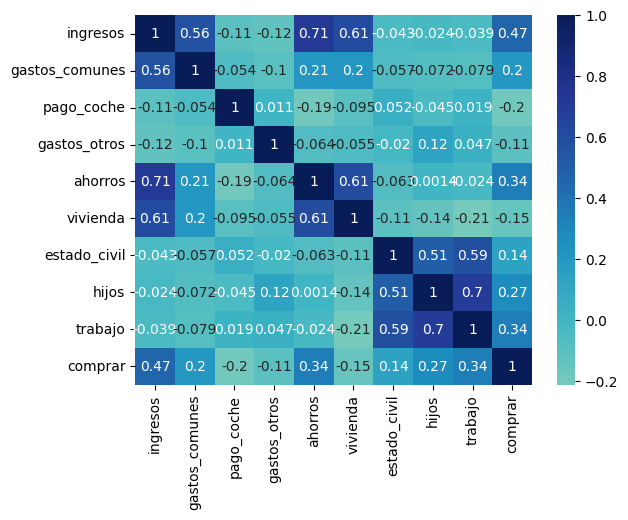

In [64]:
ax = sns.heatmap(advising_service.corr(),
                 annot=True, center=0, cmap="YlGnBu")

In [334]:
advising_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [ ]:
# Utilizare un modelo de regresion logistica porque permite estudiar la relación 
# entre una variable categórica y una o más variables independientes (numéricas o categóricas). 


In [290]:
# Termine usando estas variables ['ingresos','ahorros', 'trabajo'] para que preción media pueda ser superior a 75% 
variables_dependientes = advising_service[['ingresos','ahorros', 'trabajo']]

variable_dependiente = advising_service['comprar']

variables_dependientes.shape
X_train, x_test, Y_train, y_test = train_test_split(
    variables_dependientes, variable_dependiente, test_size=0.20)

In [291]:
model_advising_service = LogisticRegression(
    random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, Y_train)

print(
    f'La preción media del modelo logístico creado, para el entrenamiento, es: \
    {model_advising_service.score(X_train,Y_train):.5}\n')

La preción media del modelo logístico creado, para el entrenamiento, es:     0.80745



In [292]:
predicted = model_advising_service.predict(x_test)

In [293]:
print(
    f'La preción media ("Accuracy" es la precisión) del modelo logístico creado, para el test, es: \
    {metrics.accuracy_score(y_test, predicted):.5}\n')
print(
    f'La preción media ("Precision" es la exactitud) del modelo logístico creado, para el test, es: \
    {metrics.precision_score(y_test, predicted):.5}\n')
print(
    f'La preción media del modelo logístico creado, para el entrenamiento, es: \
    {model_advising_service.score(X_train,Y_train):.5}\n')

La preción media ("Accuracy" es la precisión) del modelo logístico creado, para el test, es:     0.82927

La preción media ("Precision" es la exactitud) del modelo logístico creado, para el test, es:     0.91667

La preción media del modelo logístico creado, para el entrenamiento, es:     0.80745



In [294]:
cnf_matrix = metrics.confusion_matrix(y_test, predicted)

Text(0.5, 427.9555555555555, 'Predicted label')

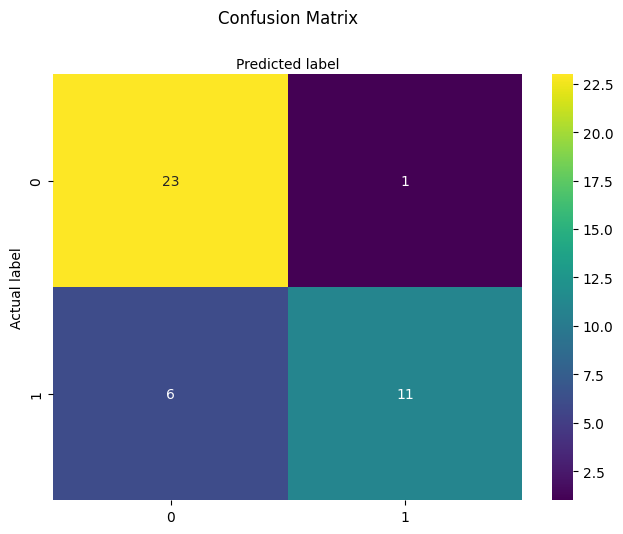

In [295]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(confusion_matrix(y_test, predicted),
            annot=True, cmap=plt.cm.viridis, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [327]:
datos_prediccion = advising_service.iloc[2].drop(['comprar','gastos_comunes','pago_coche',
                         'gastos_otros', 'vivienda', 'estado_civil', 'hijos'])
datos_prediccion.keys()

Index(['ingresos', 'ahorros', 'trabajo'], dtype='object')

In [338]:
datos_prediccion.ingresos = 3000
datos_prediccion.ahorros = 23000
datos_prediccion.trabajo = 1

datos_prediccion.head(len(datos_prediccion))

ingresos     3000
ahorros     23000
trabajo         1
Name: 2, dtype: int64

In [339]:
print(
    f'Para los datos de entrada el modelo predice: \
    {model_advising_service.predict(datos_prediccion.values.reshape(1,-1))[0]}\n')

print(
    f'Con una probabilidad de: \
    {model_advising_service.predict_proba(datos_prediccion.values.reshape(1, -1))}\n')

Para los datos de entrada el modelo predice:     0

Con una probabilidad de:     [[0.98814555 0.01185445]]



# Ejercicio 2: edad vs presión sanguinea
---

La siguiente tabla muestra información sobre la edad y la presión sanguínea de 10 mujeres:

- $edad$:(56, 42, 72,  36, 63, 47, 55, 47, 38, 42)
- $presion$:(148, 126, 159, 118, 149, 130, 151, 142, 114, 141)

Supongamos que nuestro objetivo es determinar la edad de una mujer a partir de su presión sanguínea o, lo que es lo mismo, supongamos que la variable dependiente es edad y que la variable independiente es presión. 

Se solicita dos modelos de regresion: LinealRegression y OLS, para dar solución al problema

In [5]:
df = pd.DataFrame({'edad': [56, 42, 72, 36, 63, 47, 55, 47, 38, 42],
                   'presion': [148, 126, 159, 118, 149, 130, 151, 142, 114, 141]})

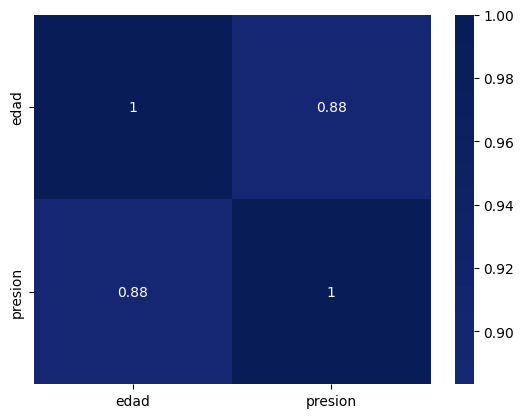

In [4]:
ax = sns.heatmap(df.corr(),
                 annot=True, center=0, cmap="YlGnBu")

In [11]:
corr_test = pearsonr(x=df.edad, y=df.presion)

print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.8832661649896839
P-value:  0.0007040335619658764


In [68]:
presion = df['presion']
edad = df['edad'].values.reshape(-1, 1)

In [ ]:
# LinealRegression

In [52]:
from sklearn.linear_model import LinearRegression

modelo_regresión_lineal = LinearRegression()
modelo_regresión_lineal.fit(edad, presion)

LinearRegression()

In [53]:
prediccion_edad = modelo_regresión_lineal.predict(edad)
prediccion_edad[0:20]

array([144.94064688, 128.81660554, 163.36812271, 121.9063021 ,
       153.00266756, 134.57519173, 143.78892964, 134.57519173,
       124.20973658, 128.81660554])

In [54]:
np.corrcoef(prediccion_edad, presion)

array([[1.        , 0.88326616],
       [0.88326616, 1.        ]])

In [57]:
X_variables_independiendes = df[['edad', 'presion']]
Y_variable_dependiente = df['edad']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(
    X_variables_independiendes, Y_variable_dependiente, test_size=0.2, random_state=3)

In [59]:
print('Según la regla aplicada del 80/20%, tenempos la siguiente volumetría de datos:')
print('Datos para entrenamiento:')
print(x_train.shape)
print(y_train.shape)
print('Datos para test:')
print(x_test.shape)
print(y_test.shape)

Según la regla aplicada del 80/20%, tenempos la siguiente volumetría de datos:
Datos para entrenamiento:
(8, 2)
(8,)
Datos para test:
(2, 2)
(2,)


In [60]:
from sklearn import linear_model
modelo_regresion_ejercicio = linear_model.LinearRegression()
modelo_regresion_ejercicio.fit(x_train, y_train)

LinearRegression()

In [61]:
modelo_regresion_ejercicio.score(x_train, y_train)

1.0

In [62]:
np.sqrt(modelo_regresion_ejercicio.score(x_train, y_train))

1.0

In [63]:
predecir = pd.DataFrame({'edad': [35], 'presion': [126]})
modelo_regresion_ejercicio.predict(predecir)

array([35.])

In [64]:
datos_prediccion = X_variables_independiendes.iloc[2]
datos_prediccion.keys()

Index(['edad', 'presion'], dtype='object')

In [65]:
datos_prediccion.TV=15
datos_prediccion.radio=4
datos_prediccion.periodicos=9

datos_prediccion.head(len(datos_prediccion))

edad        72
presion    159
Name: 2, dtype: int64

In [66]:
modelo_regresion_ejercicio.predict(datos_prediccion.values.reshape(1,-1))[0]

72.0

In [ ]:
# OLS

In [74]:
import statsmodels.formula.api as smf
estimador = smf.ols(formula='edad ~ presion', data=df).fit()
estimador.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   edad   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     28.39
Date:                Thu, 25 May 2023   Prob (F-statistic):           0.000704
Time:                        19:38:26   Log-Likelihood:                -30.551
No. Observations:                  10   AIC:                             65.10
Df Residuals:                       8   BIC:                             65.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -43.5440     17.613     -2.472      0.039     -84.159      -2.929
presion        0.6774      0.127      5.328      0.001       0.384       0.971
==============================================================================
Omnibus:                        0.380   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.827   Jarque-Bera (JB):                0.384
Skew:                          -0.346   Prob(JB):                        0.825
Kurtosis:                       2.335   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
print(estimador.summary())

                            OLS Regression Results                            
Dep. Variable:                   edad   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     28.39
Date:                Thu, 25 May 2023   Prob (F-statistic):           0.000704
Time:                        19:38:30   Log-Likelihood:                -30.551
No. Observations:                  10   AIC:                             65.10
Df Residuals:                       8   BIC:                             65.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -43.5440     17.613     -2.472      0.0